<a href="https://colab.research.google.com/github/eyvonne/DS-Unit-2-Regression-Classification/blob/master/module1/Eyve_Geo_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [X] After you remove outliers, what is the mean price in your subset of the data?
- [X] Choose a feature, and plot its relationship with the target.
- [X] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [X] Define a function to make new predictions 
- [X] explain the model coefficient.
- [X] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [X] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import numpy as np


In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 94 (delta 19), reused 29 (delta 10), pack-reused 55
Unpacking objects: 100% (94/94), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 112kB 16.6MB/s 
     |████████████████████████████████| 133kB 46.9MB/s 
     |████████████████████████████████| 57.7MB 1.3MB/s 
     |████████████████████████████████| 7.1MB 36.9MB/s 
     |████████████████████████████████| 235kB 57.6MB/s 
     |████████████████████████████████| 614kB 46.9MB/s 
     |████████████████████████████████| 225kB 31.6MB/s 
     |████████████████████████████████| 768kB 55.5MB/s 
     |████████████████████████████████| 

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.00000
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03,0.525126,0.476982,0.476759,0.446486,0.424887,0.413965,0.365983,0.052541,0.268520,0.185423,0.177055,0.132821,0.138677,0.104089,0.087190,0.060686,0.055357,0.051852,0.046847,0.043929,0.042612,0.039370,0.027517,0.02620
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04,0.499373,0.499475,0.499465,0.497133,0.494331,0.492547,0.481710,0.223117,0.443194,0.388644,0.381719,0.339385,0.345613,0.305379,0.282116,0.238757,0.228679,0.221730,0.211313,0.204940,0.201983,0.194476,0.163585,0.15973
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [0]:
#created can be a date time format
df['created']=pd.to_datetime(df['created'], infer_datetime_format=True)

In [0]:
#I don't have the natural language processing skill to manage descriptions and addresses
#so they can be dropped for now
df=df.drop(['description','display_address','street_address'],axis=1)

In [0]:
#there are 19 apartments that are renting for less than $1000. This doesn't make sense
df.query('price < 1000').shape

(19, 31)

In [0]:
df.query('price < 1000')

,bathrooms,bedrooms,created,latitude,longitude,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
1236,1.0,0,2016-04-12 03:48:49,40.7291,-74.2224,695,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4020,1.0,1,2016-04-27 19:17:48,40.7788,-73.9142,800,high,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5942,1.0,0,2016-04-13 04:20:52,40.7291,-74.2224,695,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5966,1.0,0,2016-04-06 05:24:27,40.7291,-74.2224,695,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6850,1.0,0,2016-04-06 03:33:13,40.5956,-73.7555,999,medium,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7654,1.0,1,2016-04-14 03:39:47,40.7878,-73.9763,401,low,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15172,1.0,2,2016-06-08 21:40:15,40.8624,-73.8950,700,high,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27664,2.0,3,2016-05-13 19:38:36,40.6947,-73.9025,950,low,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
28626,1.0,0,2016-05-24 05:24:56,40.7120,-73.9971,43,low,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
32187,0.0,0,2016-05-02 02:49:33,40.8529,-73.8850,868,high,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
#there are two that are under $100, these are definitly some form of error. 
#The other entries under $1000 likey scams listed that don't matter for my data
df=df.query('price > 1000')

In [0]:
#check for na values
df.isna().sum()

bathrooms               0
bedrooms                0
created                 0
latitude                0
longitude               0
price                   0
interest_level          0
elevator                0
cats_allowed            0
hardwood_floors         0
dogs_allowed            0
doorman                 0
dishwasher              0
no_fee                  0
laundry_in_building     0
fitness_center          0
pre-war                 0
laundry_in_unit         0
roof_deck               0
outdoor_space           0
dining_room             0
high_speed_internet     0
balcony                 0
swimming_pool           0
new_construction        0
terrace                 0
exclusive               0
loft                    0
garden_patio            0
wheelchair_access       0
common_outdoor_space    0
dtype: int64

In [0]:
#there are 4 properies that are over a million dollars a month, if those are removed 
#the next highest is 135k which implies that these 4 are some kind of error
df=df.query('price < 1000000')

In [0]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000,49327.000000
mean,1.212267,1.542036,40.741546,-73.955711,3674.059055,0.525128,0.477061,0.476960,0.446551,0.424980,0.414134,0.366067,0.052568,0.268534,0.185456,0.177124,0.132868,0.138707,0.104121,0.087214,0.060697,0.055365,0.051878,0.046851,0.043850,0.042634,0.039390,0.027531,0.026193
std,0.501391,1.114957,0.638695,1.178206,2535.240271,0.499373,0.499479,0.499474,0.497140,0.494345,0.492577,0.481733,0.223171,0.443202,0.388671,0.381778,0.339436,0.345644,0.305421,0.282151,0.238776,0.228694,0.221784,0.211321,0.204764,0.202032,0.194523,0.163625,0.159709
min,0.000000,0.000000,0.000000,-118.271000,1025.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991700,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.751800,-73.977900,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.774300,-73.954800,4100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.000000,44.883500,0.000000,135000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#10 bathrooms seems a bit excessive. I'm going to throw it out
df=df.query('bathrooms < 9')

In [0]:
#0 bathrooms, 0 bedrooms, and over $20000 also seems suspicious
df=df.query('not (bathrooms <1 and bedrooms<2 and price > 5000)')


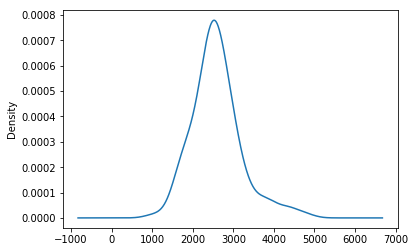

In [0]:
df.query('bathrooms < 1 and bedrooms<1 and price <5000').price.plot.kde()


In [0]:
#try some PCA on the bedrooms/bathrooms
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x=df[['bathrooms','bedrooms']].values

In [0]:
scaler=StandardScaler()
pca=PCA()
z=scaler.fit_transform(x)
pca.fit(z)
trans=pca.transform(z)
trans[:,0]
df['PCA1']=trans[:,0]

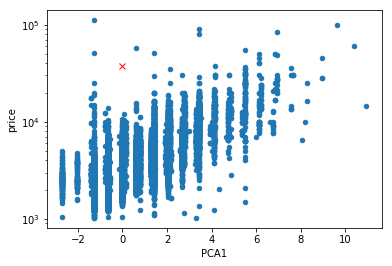

In [0]:
# on a log scale these trends look better. Those four in the upper left look like outleirs though
df.plot('PCA1','price', kind='scatter')
#plt.plot([-3, 10], [25000, 90000], color='green')
plt.plot(0,38000, color='red', marker='x')
plt.yscale('log')

In [0]:
df.query('not (price>38000 and PCA1<0)').shape

(49311, 32)

In [0]:
#removes those four points
df=df.query('not (price>38000 and PCA1<0)')

In [0]:
# 0,0 is off the coast of Africa, these were most likely NaN values that got input
#because of how big the data is I'll drop them
df.query('latitude < 1 or longitude > -1')

,bathrooms,bedrooms,created,latitude,longitude,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,PCA1
2787,5.0,6,2016-04-18 02:14:51,0.0,0.0,9995,low,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,8.189069
14104,1.0,1,2016-05-31 22:26:06,0.0,0.0,1750,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.644723
21715,1.0,1,2016-06-01 19:59:46,0.0,0.0,1725,low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.644723
22471,1.0,2,2016-06-16 15:38:11,0.0,0.0,4395,low,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.010456
25860,1.0,2,2016-05-07 08:15:32,0.0,0.0,2950,medium,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.010456
27181,1.0,2,2016-05-10 10:25:19,0.0,0.0,3619,low,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.010456
33286,4.0,3,2016-05-11 18:07:15,0.0,0.0,16500,low,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4.870653
34390,1.0,1,2016-05-10 14:30:12,0.0,0.0,3600,low,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.644723
35826,1.0,2,2016-05-24 17:43:39,0.0,0.0,3200,low,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.010456
36448,1.0,1,2016-05-10 10:11:20,0.0,0.0,3495,low,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.644723


In [0]:
df=df.query('not (latitude < 1 or longitude > -1)')

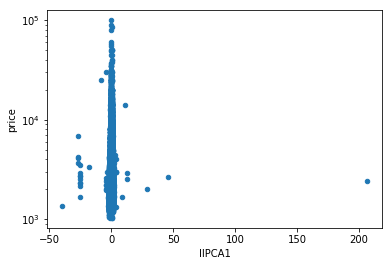

In [0]:
#perhaps Lattitude and longitude will have more info for outleirs 
latlon=df[['latitude','longitude']]
z=scaler.fit_transform(latlon)
pca.fit(z)
LLpca=pca.transform(z)
df['llPCA1']=LLpca[:,0]
df.plot('llPCA1','price', kind='scatter')
plt.yscale('log')

In [0]:
np.std(df.llPCA1)

1.1717250727739401

In [0]:
#There are 36 values that are more than three standard deviations away from
#the mean for the PCA of the latitude and longitude, checking a few of the 
#locations in google Maps reveals that these frequently are not in New York
#they will be dropped
df.query('llPCA1>3*1.1717 or llPCA1<-3*1.1717').shape

(36, 33)

In [0]:
df.query('llPCA1>3*1.1717 or llPCA1<-3*1.1717')

,bathrooms,bedrooms,created,latitude,longitude,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,PCA1,llPCA1
159,1.0,1,2016-04-15 02:52:24,41.0412,-73.5400,2195,low,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-0.644723,-4.512574
2150,1.0,0,2016-04-16 02:10:48,39.8395,-86.1527,2650,low,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.278991,46.154732
3925,1.0,0,2016-04-03 17:08:55,40.1159,-74.6267,1650,low,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1.278991,9.016919
4236,2.0,2,2016-04-15 02:53:26,41.0411,-73.5423,2205,low,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.405158,-4.504663
6153,1.0,1,2016-04-07 01:41:55,40.0450,-75.5214,2895,low,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.644723,12.451113
6546,2.0,2,2016-04-21 04:36:16,42.2019,-70.9846,2541,low,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.405158,-25.006694
7620,1.0,1,2016-04-06 13:27:48,42.2509,-71.0060,1670,low,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.644723,-25.489896
9694,1.0,1,2016-04-09 12:36:21,39.7996,-74.6248,2550,low,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-0.644723,12.538584
12387,1.0,0,2016-06-22 23:17:24,44.6038,-75.1773,1350,medium,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1.278991,-39.403902
13095,4.5,5,2016-06-06 01:20:23,40.9697,-72.1336,25000,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.846995,-7.870672


In [0]:
df=df.query('not (llPCA1>3*1.1717 or llPCA1<-3*1.1717)')

In [0]:
df.shape

(49263, 33)

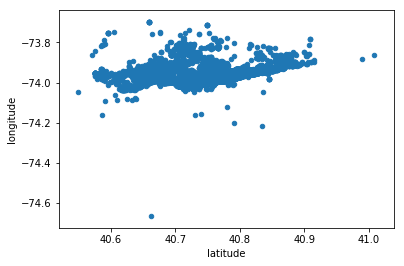

In [0]:
#check to make sure all the lattitudes and longitudes are close together 
#and in approximately the shape of New York 
df.plot('latitude','longitude','scatter')

In [0]:
df=df.query('longitude > -74.6')

In [0]:
#the mean price is about $3666
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,PCA1,llPCA1
count,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000,49262.00000,49262.000000,49262.000000,49262.000000,49262.000000,49262.000000
mean,1.212090,1.542325,40.750979,-73.972472,3665.568958,0.525151,0.477163,0.477427,0.446673,0.425318,0.414457,0.366063,0.052515,0.268483,0.185681,0.177195,0.132902,0.138687,0.104198,0.087329,0.060736,0.055418,0.051947,0.046852,0.043685,0.04269,0.039422,0.027567,0.026146,-0.000506,0.001689
std,0.498665,1.114661,0.039378,0.029488,2391.880163,0.499372,0.499483,0.499495,0.497153,0.494396,0.492633,0.481732,0.223066,0.443175,0.388853,0.381838,0.339472,0.345623,0.305520,0.282319,0.238849,0.228797,0.221922,0.211323,0.204395,0.20216,0.194598,0.163730,0.159571,1.237460,0.474916
min,0.000000,0.000000,40.549400,-74.216000,1025.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.694604,-3.195825
25%,1.000000,1.000000,40.728300,-73.991700,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.644723,-0.293608
50%,1.000000,1.000000,40.751800,-73.977900,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.644723,-0.002693
75%,1.000000,2.000000,40.774300,-73.954800,4100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.623812,0.295513
max,7.000000,8.000000,41.008200,-73.700100,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10.946757,2.475751


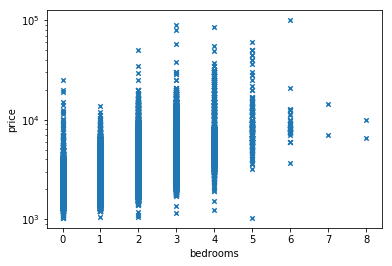

In [0]:
#this is in response to 'pick a feature and plot it against'
df.plot('bedrooms','price','scatter',marker='x')
plt.yscale('log')

In [0]:
#The instructions say to do a linear regression with only one feature. 
#I'm going to do it with the PCA of the bedrooms and bathrooms that I made. 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
features= ['PCA1']
target= 'price'
x=df[features]
y=df[target]

model.fit(x,y)

predictions= model.predict(x)

In [0]:
model.coef_[0]

1265.1441830836204

This model increases by about $1263 for each increase of the PCA. This is not terribly helpful for predictive power because the PCA is a combination of bedrooms and bathrooms. 

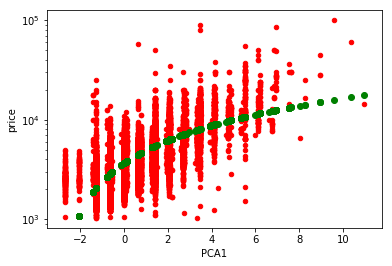

In [0]:
df.plot('PCA1','price','scatter',color='red')
plt.scatter(df['PCA1'],predictions.tolist(),color='green')
plt.yscale('log')

In [0]:
#thats a nice function with decent predictive power but isn't really useful for 
#predicting values of new apartments. I want to examine both so I'm going to 
#do the stretch goal of using two features in my model before I wrap it up into a function

features=['bedrooms','bathrooms']
target='price'
x=df[features]
y=df[target]
model.fit(x,y)
y_pred=model.predict(x)
bedbath=pd.DataFrame({'a':[3],'b':[2]})


In [0]:
def prediction(bedrooms, bathrooms):
  df=pd.DataFrame({'a':[bedrooms],'b':bathrooms})
  pred=model.predict(df)[0]
  coeff=model.coef_[0]
  string=f'An apartment with {bedrooms} bedrooms and {bathrooms} bathrooms will Cost ${pred:,.0f}'
  return string

prediction(3,2)

'An apartment with 3 bedrooms and 2 bathrooms will Cost $6,391'

In [0]:
import seaborn as sns

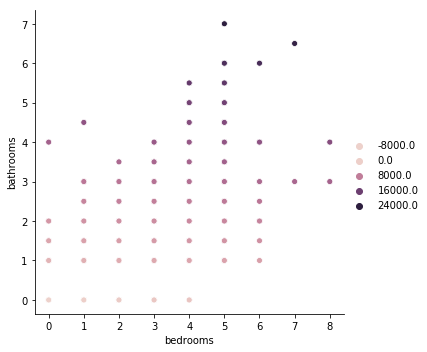

In [0]:
sns.relplot(x='bedrooms', y='bathrooms', hue=y_pred, data=df)

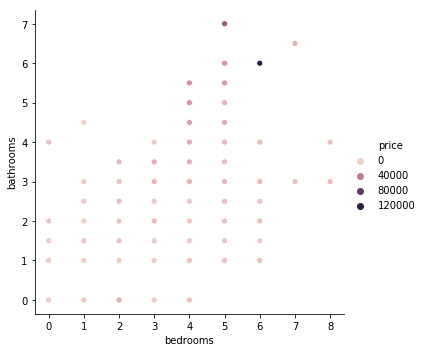

In [0]:
sns.relplot(x='bedrooms', y='bathrooms', hue='price', data=df)

In [0]:
df.query('price>6450').price.describe()

count      3026.000000
mean       9952.636153
std        5684.408620
min        6455.000000
25%        7000.000000
50%        8000.000000
75%       11000.000000
max      100000.000000
Name: price, dtype: float64

### Organize and Comment Code

In [0]:
!pip install ipywidgets

In [0]:
#do the imports 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from ipywidgets import interact

In [0]:
#load in the data
df=pd.read_csv('https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification/blob/master/data/renthop-nyc.csv?raw=true')

#Change the date-time format 
df['created']=pd.to_datetime(df['created'], infer_datetime_format=True)

#remove the columns I can't use
df=df.drop(['description','display_address','street_address'],axis=1)

#remove the entries for prices that seem to be an error for either too low (scams)
#or too high (sales listed for rent) 
df=df.query('price > 1000')
df=df.query('price < 1000000')

#remove the strange numbers of bedrooms/bathrooms 
df=df.query('bathrooms < 9')
df=df.query('not (bathrooms <1 and bedrooms<1 and price > 5000)')
df=df.query('not (latitude < 1 or longitude > -1)')

#do some PCA on bedrooms and bathrooms to eliminate further strange combos 
x=df[['bathrooms','bedrooms']].values
scaler=StandardScaler()
pca=PCA()
z=scaler.fit_transform(x)
pca.fit(z)
trans=pca.transform(z)
trans[:,0]
df['PCA1']=trans[:,0]

df=df.query('not (price>38000 and PCA1<0)')

#Do some PCA to find entries not in New York 
latlon=df[['latitude','longitude']]
z=scaler.fit_transform(latlon)
pca.fit(z)
LLpca=pca.transform(z)
df['llPCA1']=LLpca[:,0]
#remove anything more than 3 standard deviations away 
df=df.query('not (llPCA1>3*1.1717 or llPCA1<-3*1.1717)')
#after some graphical analysis there are still a few in new jersey 
df=df.query('longitude > -74.6')

#Data is now 'clean' DataScience is never done. There is more cleaning that could be 
#done but I'm calling it good enough 

#arrange features for ML
features=['bedrooms']
target='price'
X=df[features]
y=df[target]

#set up the model
model=LinearRegression()
model.fit(X,y)

#predict
def predict(beds):
  y_pred=model.predict([[beds]])
  estimate=y_pred[0]
  coef=model.coef_[0]

  results=f'${estimate:,.0f} is the estimated price of an apartment with {beds:.0f} bedrooms'
  explaination=f' Each additional bedroom adds approximately ${coef:,.2f}'
  return results+explaination

predict(3)


'$5,136 is the estimated price of an apartment with 3 bedrooms Each additional bedroom adds approximately $1,008.62'

In [0]:
class oneFeature:
  '''
  Dat= a Dataframe to do predictions on 
  feat= a string representing the name of a column in the dataframe
  tar= the column of the dataframe that will be predicted
  '''
  model=LinearRegression()
  feature, y_pred= [], []
  target=''
  featureStr=''
  coef=5
  def __init__(self, dat, feat, tar):
    if len(feat)==1:
      self.feature=dat[[feat]]
    else:
      self.feature=dat[feat]
    self.target=dat[tar].values
    self.featureStr=feat
    model.fit(self.feature, self.target)
    self.y_pred=model.predict(self.feature)
    self.coef=model.coef_[0]
  
  def predict(self, dat):
    return model.predict([[dat]])[0]
  
  def explaination(self):
    return f'For Each additional {self.featureStr} the price is increased by ${self.coef:,.2f}'
  accuracy=12

In [0]:
mods=oneFeature(df,'bedrooms','price')
mods.predict([2,3])

ValueError: ignored

In [0]:
interact(predict, beds=3);